# Machine Learning using Python

## Scikit-learn

Scikit-learn (`sklearn`) is the main Python package for machine learning. It is a widely-used and well-regarded package. However, there are a couple of challenges to using it given the usual `pandas`-based data munging pipeline. 

1. `sklearn` requires that all inputs be numeric, and in fact, `numpy` arrays.
1. `sklearn` requires that all categorical variables by replaced by 0/1 dummy variables
1. `sklearn` requires us to separate the predictors from the outcome. We need to have one `X` matrix for the predictors and one `y` vector for the outcome.

The big issue, of course, is the first point. Given we used `pandas` precisely because we wanted to be able to keep heterogenous data. We have to be able to convert non-numeric data to numeric. `pandas` does help us out with this problem. 

1. First of all, we know that all `pandas` Series and DataFrame objects can be converted to `numpy` arrays using the `values` or `to_numpy` functions. 
1. Second, we can easily extract a single variable from the data set using either the usual extracton methods or the 
`pop` function. 
1. Third, `pandas` gives us a way to convert all categorical values to numeric dummy variables using the `get_dummies` function. This is actually a more desirable solution than what you will see in cyberspace, which is to use the 
`OneHotEncoder` function from `sklearn`. 
    + This is generally fine since many machine learning models look for interactions internally and don't need them to be overtly specified. The main exceptions to this are linear and logistic regression. For those, we can use the formula methods described in the Statistical Modeling module to generate the appropriately transformed design matrix.
    + If the outcome variable is not numeric, we can `LabelEncoder` function from the `sklearn.preprocessing` submodule to convert it. 

I just threw a bunch of jargon at you. Let's see what this means.

### Transforming the outcome/target

In [2]:
import numpy as np
import pandas as pd
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

iris = sm.datasets.get_rdataset('iris').data  # pulls avalible data from within seaborn
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Let's hit the first issue first. We need to separate out the outcome (the variable we want to predict) from the predictors (in this case the sepal and petal measurements). 

In [2]:
y = iris['Species']
X = iris.drop('Species', axis = 1) # drops column, makes a copy

Another way to do this is 

In [3]:
y = iris.pop('Species') # Another way to do the same thing 

If you look at this, `iris` now only has 4 columns. So we could just use `iris` after the `pop` application, as the predictor set

We still have to update `y` to become numeric. This is where the `sklearn` functions start to be handy

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y) #makes non-numeric y numeric
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Let's talk about this code, since it's very typical of the way the `sklearn`
code works. First, we import a method (`LabelEncoder`) from the appropriate
`sklearn` module. The second line, `le = LabelEncoder()` works to "turn on" the
method. This is like taking a power tool off the shelf and plugging it in to a
socket. It's now ready to work. The third line does the actual work.  The
`fit_transform` function transforms the data you input into it based on the
method it is then attached to.

> Let's make a quick analogy. You can plug in both a power washer and a
jackhammer to get them ready to go. You can then apply each of them to your
driveway. They "transform" the driveway in different ways depending on which
tool is used. The washer would "transform" the driveway by cleaning it, while
the jackhammer would transform the driveway by breaking it.

There's an interesting invisible quirk to the code, though. The object `le` also got transformed during this 
process. There were pieces added to it during the `fit_transform` process. 

In [5]:
le = LabelEncoder()
d1 = dir(le)

In [6]:
y = le.fit_transform( pd.read_csv('data/iris.csv')['species'])
d2 = dir(le)
set(d2).difference(set(d1)) # set of things in d2 but not in d1

{'classes_'}

So we see that there is a new component added, called `classes_`. 

In [7]:
le.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

So the original labels aren't destroyed; they are being stored. This can be useful.

In [8]:
le.inverse_transform([0,1,1,2,0]) # gets the words associated with the numerical encoding 

array(['setosa', 'versicolor', 'versicolor', 'virginica', 'setosa'],
      dtype=object)

So we can transform back from the numeric to the labels. Keep this in hand, since it will prove useful after
we have done some predictions using a ML model, which will give numeric predictions. 

### Transforming the predictors

Let's look at a second example. The `diamonds` dataset has several categorical variables that would need to be transformed. 

In [10]:
diamonds = pd.read_csv('data/diamonds.csv.gz')

y = diamonds.pop('price').values # the .values ensures we have a numpy array not a pandas series
X = pd.get_dummies(diamonds) # converts all other features to numerical values

# Alternatively
# import patsy
# f = '~ np.log(carat) +  + clarity + depth + cut * color'
# X = patsy.dmatrix(f, data=diamonds)

In [11]:
type(y)

numpy.ndarray

In [4]:
type(X)

pandas.core.frame.DataFrame

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   x              53940 non-null  float64
 4   y              53940 non-null  float64
 5   z              53940 non-null  float64
 6   cut_Fair       53940 non-null  uint8  
 7   cut_Good       53940 non-null  uint8  
 8   cut_Ideal      53940 non-null  uint8  
 9   cut_Premium    53940 non-null  uint8  
 10  cut_Very Good  53940 non-null  uint8  
 11  color_D        53940 non-null  uint8  
 12  color_E        53940 non-null  uint8  
 13  color_F        53940 non-null  uint8  
 14  color_G        53940 non-null  uint8  
 15  color_H        53940 non-null  uint8  
 16  color_I        53940 non-null  uint8  
 17  color_J        53940 non-null  uint8  
 18  clarit

So everything is now numeric!!. Let's take a peek inside.

In [12]:
X.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

So, it looks like the continuous variables remain intact, but the categorical variables got exploded out. Each
variable name has a level with it, which represents the particular level it is representing. Each of these 
variables, called dummy variables, are numerical 0/1 variables. For example, `color_F` is 1 for those diamonds which have color F, and 0 otherwise. 

In [14]:
help(pd.crosstab)

Help on function crosstab in module pandas.core.reshape.pivot:

crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'
    Compute a simple cross tabulation of two (or more) factors. By default
    computes a frequency table of the factors unless an array of values and an
    aggregation function are passed.
    
    Parameters
    ----------
    index : array-like, Series, or list of arrays/Series
        Values to group by in the rows.
    columns : array-like, Series, or list of arrays/Series
        Values to group by in the columns.
    values : array-like, optional
        Array of values to aggregate according to the factors.
        Requires `aggfunc` be specified.
    rownames : sequence, default None
        If passed, must match number of row arrays passed.
    colnames : sequence, default None
        If passed, must match number of column arrays passed.

In [15]:
pd.crosstab(X['color_F'], diamonds['color']) 
#Compute a simple cross tabulation of two (or more) factors. By default
#computes a frequency table of the factors unless an array of values and an aggregation function are passed.

# here: in the new representation "X" the value of color_F is zero everywhere execpt the locations where 
# in the old representation "dimonds" the color column is labeled "F"

color,D,E,F,G,H,I,J
color_F,,,,,,,
0,6775,9797,0,11292,8304,5422,2808
1,0,0,9542,0,0,0,0


## Supervised Learning

We will first look at supervised learning methods. 

| ML method               | Code to call it                                              |
| ----------------------- | ------------------------------------------------------------ |
| Decision Tree           | `sklearn.tree.DecisionTreeClassifier`, `sklearn.tree.DecisionTreeRegressor` |
| Random Forest           | `sklearn.ensemble.RandomForestClassifier`, `sklearn.ensemble.RandomForestRegressor` |
| Linear Regression       | `sklearn.linear_model.LinearRegression`                      |
| Logistic Regression     | `sklearn.linear_model.LogisticRegression`                    |
| Support Vector Machines | `sklearn.svm.LinearSVC`, `sklearn.svm.LinearSVR`             |
|                         |                                                              |

The general method that the code will follow is :

```
from sklearn.... import Machine
machine = Machine(*parameters*)
machine.fit(X, y)
```

### A quick example

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# initiating both linear regression and decision tree 
lm = LinearRegression()
dt = DecisionTreeRegressor()

Lets manufacture some data

In [18]:
help(lm.predict)

Help on method predict in module sklearn.linear_model._base:

predict(X) method of sklearn.linear_model._base.LinearRegression instance
    Predict using the linear model.
    
    Parameters
    ----------
    X : array_like or sparse matrix, shape (n_samples, n_features)
        Samples.
    
    Returns
    -------
    C : array, shape (n_samples,)
        Returns predicted values.



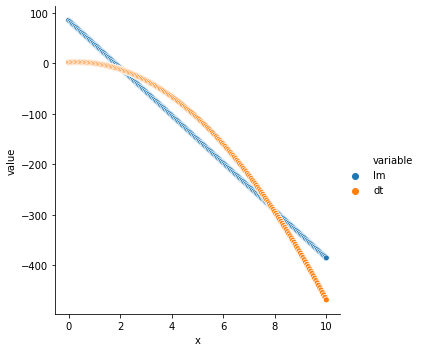

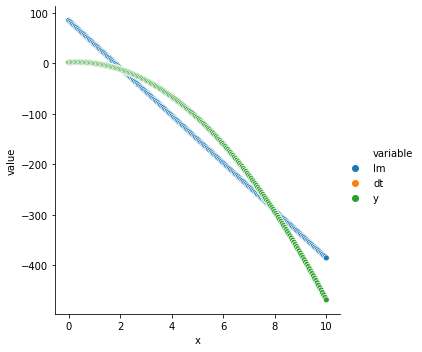

In [22]:
# create a function 
x = np.linspace(0, 10, 200)
y = 2 + 3*x - 5*(x**2) # y is a non-linear function of x 
d = pd.DataFrame({'x': x}) # create a dataframe of x 

lm.fit(d,y) # Using linear regression fit d to y (training)
dt.fit(d, y) # Using a decision Tree fit d to y (training)

p1 = lm.predict(d) #prediction using trained model, Linear regression 
p2 = dt.predict(d) #prediction using trained model, decision tree 

# add to dataframe d for plotting without ground truth 
d['lm'] = p1
d['dt'] = p2


D = pd.melt(d, id_vars = 'x')

sns.relplot(data=D, x = 'x', y = 'value', hue = 'variable')
plt.show()

#with ground truth, y and the dt overlap perfectly!! 
d['lm'] = p1
d['dt'] = p2
d['y'] = y
D = pd.melt(d, id_vars = 'x')

sns.relplot(data=D, x = 'x', y = 'value', hue = 'variable')
plt.show()

From this we note that linear regression is unable to fit a non-linear function, but the decision tree can

### A data analytic example

In [23]:
diamonds = pd.read_csv('data/diamonds.csv.gz')
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


First, lets separate out the outcome (price) and the predictors

In [24]:
y = diamonds.pop('price')

For many machine learning problems, it is useful to scale the numeric predictors so that they have mean 0 and 
variance 1. First we need to separate out the categorical and numeric variables

In [25]:
d1 = diamonds.select_dtypes(include = 'number') #numeric variables 
d2 = diamonds.select_dtypes(exclude = 'number') #categorial variables 

Now let's scale the columns of `d1`

In [19]:
from sklearn.preprocessing import scale

bl = scale(d1) #scalling the numerical values so they have mean 0 and varience 1 
bl

array([[-1.19816781, -0.17409151, -1.09967199, -1.58783745, -1.53619556,
        -1.57112919],
       [-1.24036129, -1.36073849,  1.58552871, -1.64132529, -1.65877419,
        -1.74117497],
       [-1.19816781, -3.38501862,  3.37566251, -1.49869105, -1.45739502,
        -1.74117497],
       ...,
       [-0.20662095,  0.73334442,  1.13799526, -0.06343409, -0.04774083,
         0.03013526],
       [ 0.13092691, -0.52310533,  0.24292836,  0.37338325,  0.33750627,
         0.28520393],
       [-0.10113725,  0.31452784, -1.09967199,  0.08811478,  0.11861587,
         0.14349912]])

Woops!! We get a `numpy` array, not a `DataFrame`!!

In [20]:
bl = pd.DataFrame(scale(d1))
bl.columns = list(d1.columns)
d1 = bl

Now, let's recode the categorical variables into dummy variables.

In [21]:
d2 = pd.get_dummies(d2) # change the categorical variables to numerical representation 

and put them back together

In [22]:
X = pd.concat([d1,d2], axis = 1) #combine back into one dataframe

Next we need to split the data into a training set and a test set. Usually we do this as an 80/20 split. 
The purpose of the test set is to see how well the model works on an "external" data set. We don't touch the 
test set until we're done with all our model building in the training set. We usually do the split using 
random numbers. We'll put 40,000 observations in the training set.


In [23]:
ind = list(X.index)
np.random.shuffle(ind) #randomize the indexes we are selecting

X_train, y_train = X.loc[ind[:40000],:], y[ind[:40000]]
X_test, y_test = X.loc[ind[40000:],:], y[ind[40000:]]

There is another way to do this

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state= 40) 
#this one line does what the above several do!! 

Now we will fit our models to the training data. Let's use a decision tree model, a random forest model, and a linear regression.

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#initialize models
lm = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

Now we will use our training data to fit the models

In [37]:
# use the fit command to train the models on the training data
lm.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

We now need to see how well the model fit the data. We'll use the R2 statistic to be our metric of choice to evaluate the model fit.

In [32]:
from sklearn.metrics import  r2_score
# bellow we predict on the training data and get the R2 score all in one go! 

pd.DataFrame({
  'Model': ['Linear regression','Decision tree','Random forest'],
  'R2': [r2_score(y_train, lm.predict(X_train)),
    r2_score(y_train, dt.predict(X_train)),
    r2_score(y_train, rf.predict(X_train))]
})



,Model,R2
0,Linear regression,0.920264
1,Decision tree,0.999997
2,Random forest,0.997326


This is pretty amazing. However, we know that if we try and predict using the same data we used to train 
the model, we get better than expected results. One way to get a better idea about the true performance of the 
model when we will try it on external data is to do cross-validation. 

### Visualizing a decision tree  (End of Lecture) 

Bellow are useful examples some of which will be covered in the videos and some are provided for further learning. The code is less commented, but we are confident you will be able to use your new skills to understand it! 

**scikit-learn** provides a decent way of visualizing a decision tree using a program called _Graphviz_, which is a dedicated graph and network visualization program.

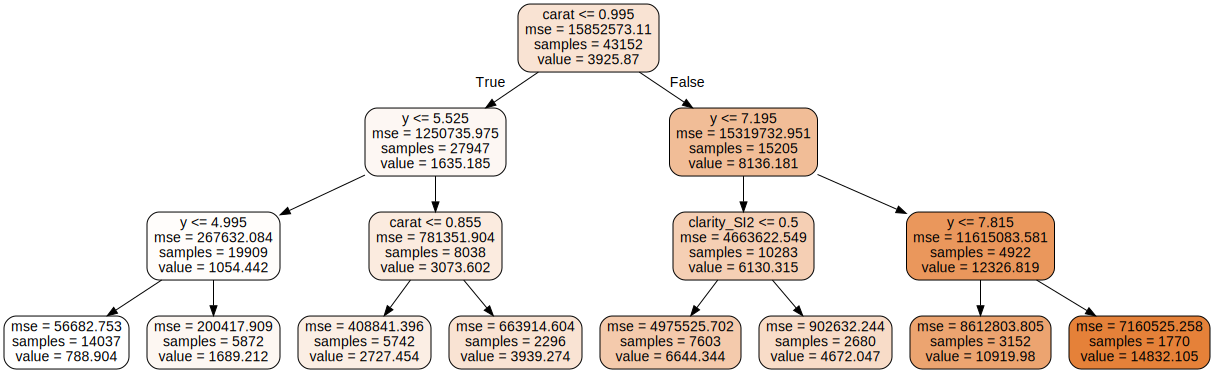

In [33]:
import graphviz
from sklearn import tree

dt = DecisionTreeRegressor(max_depth=3) #initalize decsion tree that is only allowed 3 splits
dt.fit(X_train, y_train) #train the model 

#visualize the decsion tree 
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names = X_train.columns,
                                filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [29]:
graph.render('graphs/image', view=False, format='pdf');
graph.render('graphs/image', view = False, format = 'png');

### Cross-validation

In cross-validation, we split the dataset up into 5  equal parts randomly. We then train the
model using 4 parts and predict the data on the 5th part. We do for all possible groups of 4 parts. We then
consider the overall performance of prediction.

![](graphs/CV5.png)

There is nothing special about the 5 splits. If you use 5 splits, it is called 5-fold cross-validatio    n (CV), if you use 10 splits, it is 10-fold CV. If you use all but one subject as training data, and     that one subject as test data, and cycle through all the subjects, that is called leave-one-out CV (L    OOCV). All these methods are widely used, but 5- and 10-fold CV are often used as a balance between e    ffectiveness and computational efficiency.

**scikit-learn** makes this pretty easy, using the `cross_val_score` function. 


In [34]:
from sklearn.model_selection import cross_val_score


cv_score = cross_val_score(dt, X_train, y_train, cv=5, scoring='r2')
f"CV error = {np.round(np.mean(cv_score), 3)}"

'CV error = 0.874'

### Improving models through cross-validation

The cross-validation error, as we've seen, gives us a better estimate of  
how well our model predicts on new data. We can use this to tune models by tweaking their parameters to get models that reasonably will perform better. 

Each model that we fit has a set of parameters that govern how it proceeds
to fit the data. These can bee seen using the `get_params` function. 

In [36]:
dt.get_params()
lm.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

Linear regression is entirely determined by the functional form of  
the prediction equation,i.e., the "formula" we use. It doesn't have any parameters to tune per se. Improving a linear regression involves playing 
with the different predictors and transforming them to improve the predictions. This involve subjects called _regression diagnostics_ and 
_feature engineering_ that we will leave to Google for now. 


We can tune different parameters for the decision tree to try and see if
some combination of parameters can improve predictions. One way to do this,
since we're using a computer, is a grid search. This means that we can set out sets of values of the parameters we want to tune, and the computer will go through every combination of those values to see how the model
performs, and will provide the "best" model.

We would specify the values as a dictionary to the function `GridSearchCV`, which would optimize based on the cross-validation error.

In [32]:
from sklearn.model_selection import GridSearchCV
import numpy.random as rnd
rnd.RandomState(39358)

param_grid = {'max_depth': [1,3,5,7, 10], 'min_samples_leaf': [1,5,10,20],
  'max_features' : ['auto','sqrt']}

clf = GridSearchCV(dt, param_grid, scoring = 'r2', cv = 5) # Tuning dt
clf.fit(X_train, y_train)

clf.best_estimator_
print(clf.best_score_)

0.9645392330464674


So how does this do on the test set?

In [33]:
p = clf.best_estimator_.predict(X_test)
r2_score(y_test, p)

0.965725057737719

So this predictor is doing slightly better on the test set than the training set. This is often an indicator that the model is overfitting on the data. This is probable here, given the extremely high R2 values for this model.


### Feature selection

We can also use cross-validation to do recursive feature selection (or
backwards elimination), based on a predictive score. This is different
from usual stepwise selection methods which are based on a succession of
hypothesis tests.

In [34]:
from sklearn.feature_selection import RFECV

selector = RFECV(lm, cv = 5, scoring = 'r2')
selector = selector.fit(X_train, y_train)
selector.support_

array([ True, False, False,  True, False, False,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True])

The support gives the set of predictors (True) that are finally selected.

In [35]:
X_train.columns[selector.support_]

Index(['carat', 'x', 'cut_Fair', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'color_D', 'color_E', 'color_F', 'color_G', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

This is indicating that the best predictive model for the linear regression includes carat, cut, color and clarity, and width of the stone.

### Logistic regression

We noted that logistic regression is available both through **statsmodels** and through **scikit-learn**. Let's now try to fit a
logistic regression model using **scikit-learn**. We will use the same
Titanic dataset we used earlier.

In [36]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression

titanic = sm.datasets.get_rdataset('Titanic','Stat2Data').data.dropna()
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 0 to 1312
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      756 non-null    object 
 1   PClass    756 non-null    object 
 2   Age       756 non-null    float64
 3   Sex       756 non-null    object 
 4   Survived  756 non-null    int64  
 5   SexCode   756 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 41.3+ KB


We will model `Survived` on the age, sex and passenger class of passengers.

In [37]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(titanic[['Age','Sex','PClass']], drop_first=True)
y = titanic.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state= 40) # 80/20 split

lrm = LogisticRegression()
lrm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

There are a few differences that are now evident between this model and
the model we fit using **statsmodels**. As a reminder, we fit this model again below.

In [38]:
titanic1 = titanic.loc[X_train.index,:]
titanic2 = titanic.loc[X_test.index,:]
mod_logistic = smf.glm('Survived ~ Age + Sex + PClass', data=titanic1,
  family = sm.families.Binomial()).fit()
mod_logistic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  604
Model:                            GLM   Df Residuals:                      599
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -282.34
Date:                Wed, 09 Dec 2020   Deviance:                       564.68
Time:                        12:39:47   Pearson chi2:                     666.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.6795      0.440      8.362      0.000       2.817       4.542
Sex[T.male]      -2.5138      0.221    -11.353      0.000      -2.948      -2.080
PClass[T.2nd]    -1.2057      0.290     -4.155      0.000      -1.774      -0.637
PClass[T.3rd]    -2.5974      0.305     -8.528      0.000      -3.194      -2.000
Age              -0.0367      0.008     -4.385      0.000      -0.053      -0.020
=================================================================================
"""

We can see the objects that are available to us from the two models using
`dir(lrm)` and `dir(mod_logistic)`. We find that `lrm` does not give us
any parameter estimates, p-values or summary methods. It is much leaner, and, in line with other machine learning models, emphasizes predictions. So if you want to find associations between predictors and outcome, you will have to use the **statsmodels** version.

Let's compare the predictions.

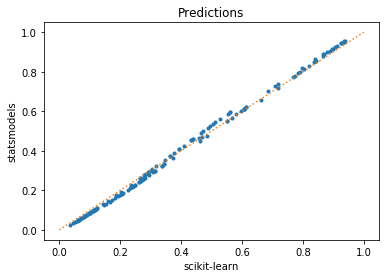

In [39]:
plt.clf()
p1 = lrm.predict_proba(X_test)[:,1]
p2 = mod_logistic.predict(titanic2)

plt.plot(p1, p2, '.')
plt.plot([0,1],[0,1], ':')
plt.xlabel('scikit-learn')
plt.ylabel('statsmodels')
plt.title('Predictions')
plt.show()

First note that the prediction functions work a bit differently. For `lrm` we have to explicitly ask for the probability predictions, whereas those are automatically provided for `mod_logistic`. We also find that the predictions aren't exactly the same. This is because `lrm`, by default, runs a penalized regression using the lasso criteria (L2 norm), rather than the non-penalized version that `mod_logistic` runs. We can specify no penalty for `lrm` and can see much closer agreement between the two models.

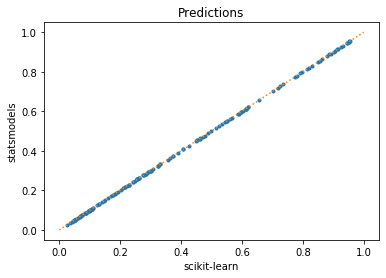

In [40]:
lrm = LogisticRegression(penalty='none')
lrm.fit(X_train, y_train)
p1 = lrm.predict_proba(X_test)[:,1]

plt.clf()
plt.plot(p1, p2, '.')
plt.plot([0,1],[0,1], ':')
plt.xlabel('scikit-learn')
plt.ylabel('statsmodels')
plt.title('Predictions')
plt.show()

## Unsupervised learning


Unsupervised learning is a class of machine learning methods where we are just trying to identify patterns in the data without any labels. This is in contrast to _supervised learning_, which are the modeling methods we have discussed above.

Most unsupervised learning methods fall broadly into a set of algorithms called _cluster analysis_. **scikit-learn** provides several clustering algorithms.


![](graphs/cluster_choice.png)


We will demonstrate the two more popular choices -- K-Means and Agglomerative clustering (also known as hierarchical clustering). We will use the classic Fisher's Iris data for this demonstration.

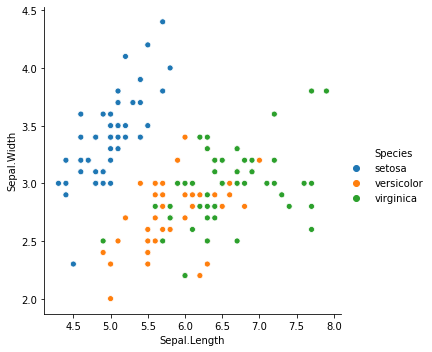

In [41]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering

iris = sm.datasets.get_rdataset('iris').data
sns.relplot(data=iris, x = 'Sepal.Length',y = 'Sepal.Width', hue = 'Species');


The K-Means algorithm takes a pre-specified number of clusters as input, and then tries to find contiguous regions of the data to parse into clusters.

In [42]:
km = KMeans(n_clusters = 3)
km.fit(iris[['Sepal.Length','Sepal.Width']]);

In [43]:
km.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

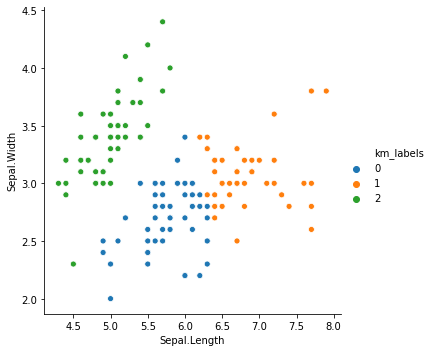

In [44]:
iris['km_labels'] = km.labels_
iris['km_labels'] = iris.km_labels.astype('category')

sns.relplot(data=iris, x = 'Sepal.Length', y = 'Sepal.Width',
           hue = 'km_labels');

Agglomerative clustering takes a different approach. It starts by coalescing individual points successively, based on a distance metric and a principle for how to coalesce groups of points (called _linkage_). The number of clusters can then be determined either visually or via different cutoffs.

In [45]:
hc = AgglomerativeClustering(distance_threshold=0, n_clusters=None,
                             linkage='complete')

hc.fit(iris[['Sepal.Length','Sepal.Width']])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=0,
                        linkage='complete', memory=None, n_clusters=None)

In [46]:
hc.linkage

'complete'

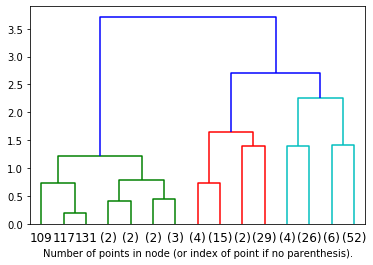

In [47]:
from scipy.cluster.hierarchy import dendrogram

## The following is from https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plot_dendrogram(hc, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


In [48]:
hc = AgglomerativeClustering( n_clusters=3,
                             linkage='average')

hc.fit(iris[['Sepal.Length','Sepal.Width']]);


In [49]:
hc.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 0, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

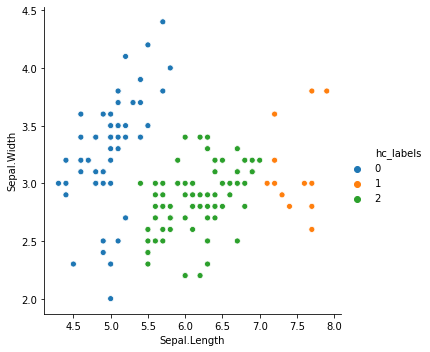

In [50]:
iris['hc_labels'] = pd.Series(hc.labels_).astype('category')

sns.relplot(data=iris, x = 'Sepal.Length', y= 'Sepal.Width',
           hue = 'hc_labels');


Play around with different linkage methods to see how these clusters change.